# Assignment 1
### Understanding Uncertainty
### Due 9/5

1. Create a new public repo on Github under your account. Include a readme file.
2. Clone it to your machine. Put this file into that repo.
3. Use the following function to download the example data for the course:

In [2]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download file already exists
Data directory already exists


4. Open one of the datasets using Pandas:
    1. `ames_prices.csv`: Housing characteristics and prices
    2. `college_completion.csv`: Public, nonprofit, and for-profit educational institutions, graduation rates, and financial aid
    3. `ForeignGifts_edu.csv`: Monetary and in-kind transfers from foreign entities to U.S. educational institutions
    4. `iowa.csv`: Liquor sales in Iowa, at the transaction level
    5. `metabric.csv`: Cancer patient and outcome data
    6. `mn_police_use_of_force.csv`: Records of physical altercations between Minnessota police and private citizens
    7. `nhanes_data_17_18.csv`: National Health and Nutrition Examination Survey
    8. `tuna.csv`: Yellowfin Tuna Genome (I don't recommend this one; it's just a sequence of G, C, A, T )
    9. `va_procurement.csv`: Public spending by the state of Virginia

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
va = pd.read_csv('./data/va_procurement.csv')
va.head().T

,0,1,2,3,4
Unnamed: 0,1209821,1511053,410883,1360394,1180847
Entity Description,Virginia Polytechnic Institute and State Unive...,Virginia Department of Energy,Department of Corrections - Academy,Old Dominion University,Longwood University
NIGP #,91577.0,20468.0,38542.0,49000.0,5000.0
NIGP Description,"Telephone Services, Long Distance and Local (I...","Peripherals, Miscellaneous: Joy Sticks, Graphi...","Entrees, Meat (Includes Beef and Pork)","LABORATORY EQUIPMENT, ACCESSORIES AND SUPPLIES...",ART EQUIPMENT AND SUPPLIES
Item Description,-10K 14-17' DF IND FORKLIFT0550610,Fellowes Microbanreg Mouse Pad - Black,Performance Foodservice Invoice# 5219606 Del...,SystemETF# ********* RS020 Ø1 TappedPostS...,"Scotch Multi-Purpose Scissors, 7 Inches, Strai..."
Order #,A208_P4426539,PCO04672013,PO04394339,PO04579739-V2,PO04601721
Quantity Ordered,1.0,12.0,1.0,3.0,74.0
Unit Price,1895.0,5.0,234.2,11.51,3.57
Unit of Measure,EA,EA,LO,EA,EA
Line Total,1895.0,60.0,234.2,34.53,264.18


In [5]:
va.shape

(95902, 15)

5. Pick two or three variables and briefly analyze them
    - Is it a categorical or numeric variable?
    - How many missing values are there? (`df['var'].isna()` and `np.sum()`)
    - If categorical, tabulate the values (`df['var'].value_counts()`) and if numeric, get a summary (`df['var'].describe()`)

##### Line Total - Numeric variable

In [6]:
print(np.sum(va['Line Total']))
print(np.sum(va['Line Total'].isna()))
print(va['Line Total'].describe())

2164498949.93079
0
count    9.590200e+04
mean     2.256990e+04
std      1.167073e+06
min     -9.625000e+04
25%      3.241250e+01
50%      1.342050e+02
75%      6.669800e+02
max      2.094900e+08
Name: Line Total, dtype: float64


<Axes: xlabel='Line Total'>

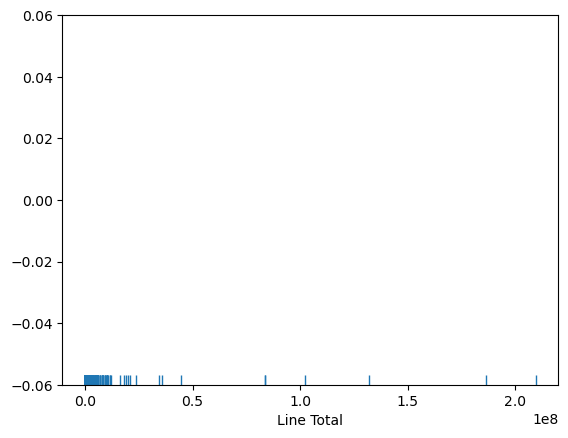

In [7]:
sns.rugplot(va['Line Total'])

##### Entity Description - Categorical variable

In [15]:
print(len(va['Entity Description'].unique()))
print(np.sum(va['Entity Description'].isna()))
print(va['Entity Description'].value_counts())

221
0
Entity Description
University of Virginia                                 17868
Virginia Polytechnic Institute and State University    10684
Virginia Department of Transportation                   8791
Virginia Commonwealth University                        5980
George Mason University                                 4195
                                                       ...  
Montgomery County Public Schools                           1
Botetourt County Public Schools                            1
Virginia Peninsula Regional Jail                           1
Bristol Virginia Public Schools                            1
Clarke County                                              1
Name: count, Length: 221, dtype: int64


<Axes: xlabel='Entity Description', ylabel='Count'>

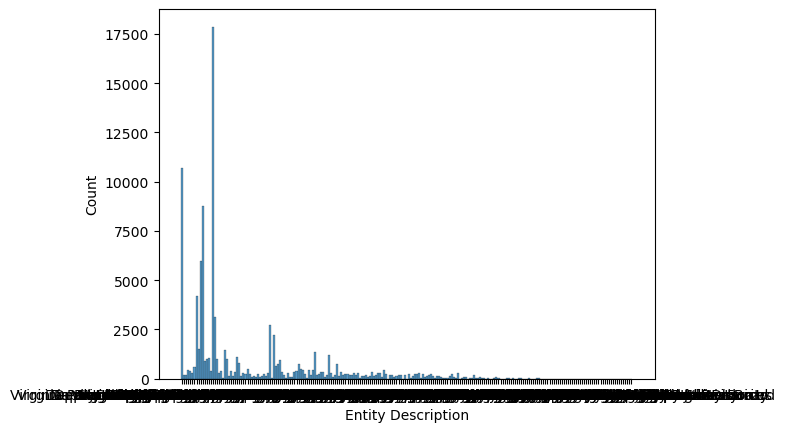

In [9]:
sns.histplot(va['Entity Description'])

In [16]:
print(len(va['Vendor Name'].unique()))
print(np.sum(va['Vendor Name'].isna()))
print(va['Vendor Name'].value_counts())

10875
0
Vendor Name
TSRC - State of VA                              4569
Virginia Distribution Center - VDC - DGS        4315
W W Grainger Inc                                1846
Amazon com LLC                                  1794
Fisher Scientific Company, LLC                  1460
                                                ... 
Omron Electronics LLC                              1
Patterson Pope Inc                                 1
Assessment Technologies Institute LLC              1
PricewaterhouseCoopers Advisory Services LLC       1
Pilot Institute                                    1
Name: count, Length: 10875, dtype: int64


6. What are some questions and prediction tools you could create using these data? Who would the stakeholder be for that prediction tool? What practical or ethical questions would it create? What other data would you want, that are not available in your data?

##### Questions for this dataset include:
What type of work are vendors doing in the state of Virginia? How much are they getting paid?
- Total contract value by vendor / Average contract value by vendor / Types of contracts by vendor

The same questions apply to purchasers.
Total contract value by purchaser / Total spent by purchaser / Types of contracts by purchaser

Do vendors appear to operate in certain geographies, or are they all over the state?
- Need to incorporate external data for a rigorous analysis.

##### Predictive tools for vendors:
- When is the next time a purchaser needs XYZ good or service? (e.g. lifetime of an HVAC system is 18 years)
- If a high school bought XYZ good or service, what is the probability similar schools like them will need the same thing?
- Which purchasers spend the most money in types of business that I can bid for?
- Which purchasers have the least competition per dollar spent in my type of business?

##### Predictive tools for purchasers:
- Who are some companies to reach out to in my area if I need XYZ good or service?
- Who are small businesses I can support that are getting a foothold in the government contracting space? (it is common in government contracting to identify businesses by socioeconomic codes like woman-owned or veteran-owned)
- Can we identify duplicative spending? Can we prevent ourselves from making purchases for items which another county already has?
- Can we consolidate contracts to get a better deal?

##### Ethical questions:
- During their market research, should government buyers limit the scope of vendors to people who have already done the job?
- Would access to such data be expensive or restricted to large vendors, so that they have an even greater advantage over small businesses?
- Would consolidating contracts squeeze vendors in an already uncertain economic environment? (i.e. while dealing with tariff impacts)

##### Other data that would be interesting:
- Geographic data about the location of purchasers and vendors
- Google star ratings for services companies
- Percent of revenue for contractors (esp. public companies)

7. Commit your work to the repo (`git commit -am 'Finish assignment'` at the command line, or use the Git panel in VS Code). Push your work back to Github and submit the link on Canvas in the assignment tab.